In [38]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

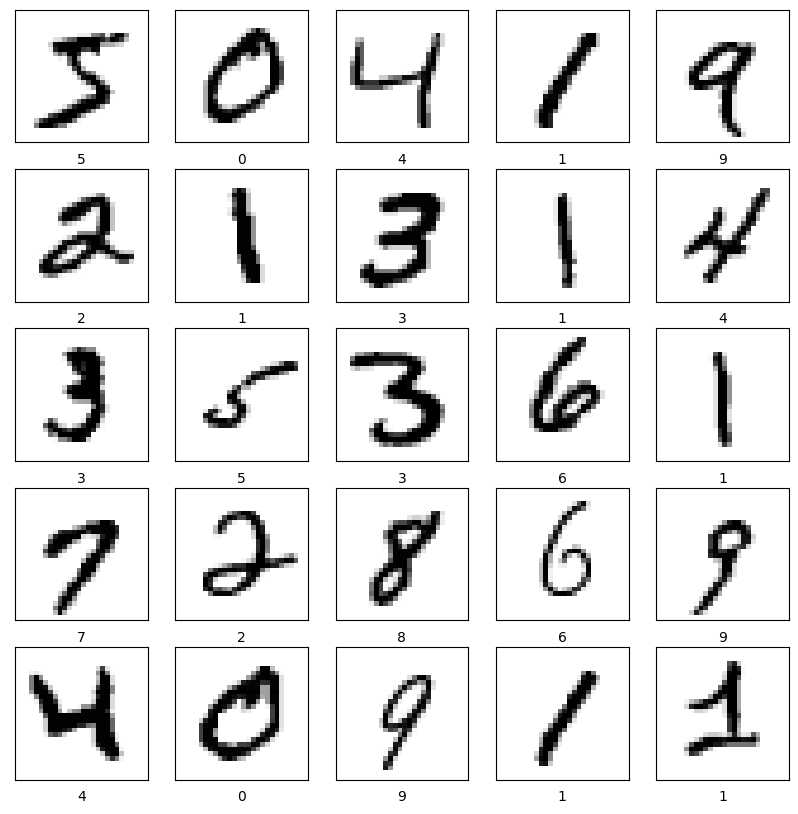

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25): 
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [27]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [28]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10))




In [40]:
import tensorflow as tf

model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])




In [41]:
model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.2369 - accuracy: 0.9416 - val_loss: 0.0796 - val_accuracy: 0.9754
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0643 - accuracy: 0.9806 - val_loss: 0.0460 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0522 - val_accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0490 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.0487 - val_accuracy: 0.9854
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.0672 -

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 4ms/step - loss: 0.0366 - accuracy: 0.9903


In [43]:
model.save('mnist.h5')

In [44]:
from keras.models import load_model
model = load_model('mnist.h5')

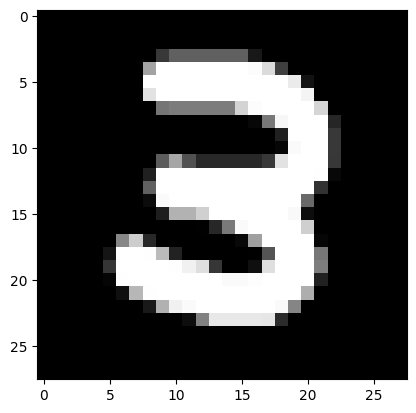

In [66]:
import cv2
tst = cv2.imread('number.png', cv2.IMREAD_GRAYSCALE)
tst = cv2.resize(tst, (28, 28))

tst = tst.astype('float32') /255



plt.imshow(tst.reshape((28, 28)), cmap=plt.cm.binary)
plt.show()


In [67]:
BLUE_COLOR = "\033[94m"
WHITE_COLOR = "\033[97m"
RED_COLOR = "\033[91m"

def prediction(image, k, n):
    image = image.reshape((1, 28, 28, 1))
    image = image.astype('float32') / 255
    pred = model.predict(image)
    pred = tf.nn.softmax(pred)
    pred = tf.math.top_k(pred, k)
    pred = tf.reshape(pred, (k, 2))
    print(f"{BLUE_COLOR}Top {k} predictions:")
    for i in range(k):
        print(f"{WHITE_COLOR}Prediction {i+1}: {RED_COLOR}{pred[i][0]}{WHITE_COLOR} with probability {RED_COLOR}{pred[i][1]}{WHITE_COLOR}")
    
    pred = tf.math.top_k(pred, n)
    pred = tf.reshape(pred, (n, 2))
    print(f"{BLUE_COLOR}Top {n} predictions:")
    for i in range(n):
        print(f"{WHITE_COLOR}Prediction {i+1}: {RED_COLOR}{pred[i][0]}{WHITE_COLOR} with probability {RED_COLOR}{pred[i][1]}{WHITE_COLOR}")

prediction(tst, 10, 1)
  

1/1 [==============================] - 0s 23ms/step


InvalidArgumentError: cannot compute Pack as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:Pack] name: packed

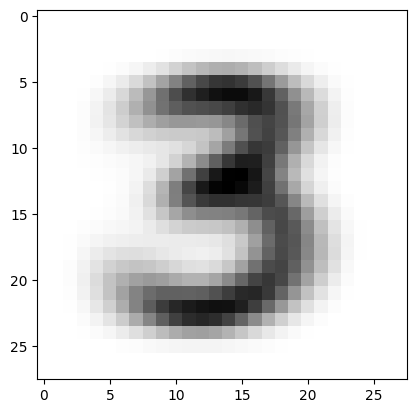

In [28]:
train_images_new = train_images.reshape((60000, 28, 28))

train_images_new = train_images_new[train_labels[:, 3] == 1].sum(axis=0)

train_images_new = train_images_new / train_images_new.sum()

plt.imshow(train_images_new, cmap=plt.cm.binary)
plt.show()

 

In [31]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()  




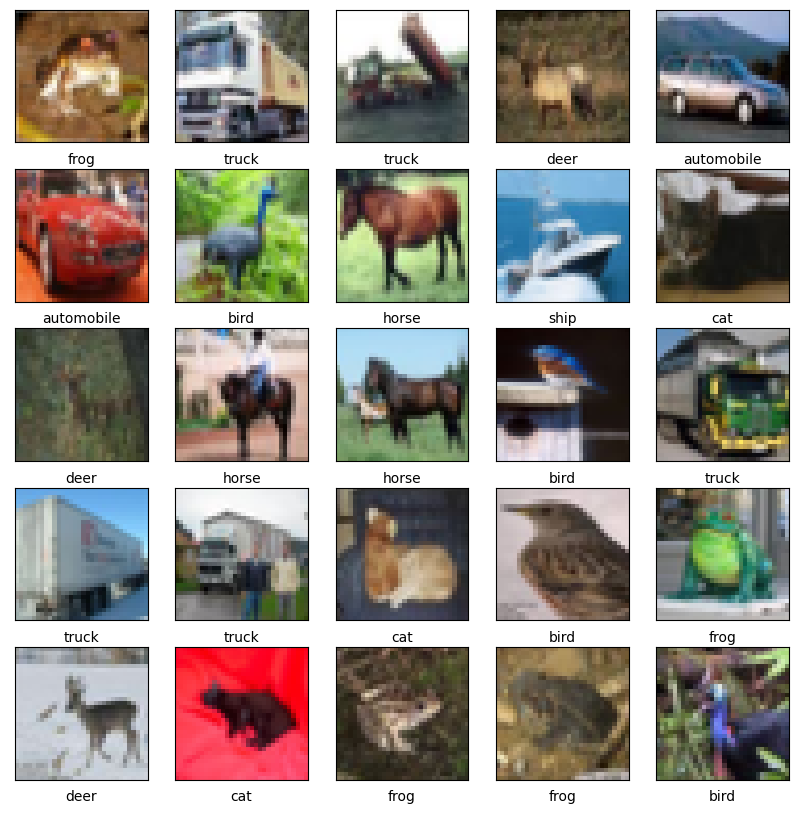

In [32]:
# display color images from cifar10 dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i][0]])

In [33]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [34]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(2048, activation='relu', input_shape=(32 * 32 * 3,)))
network.add(layers.Dense(1024, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:

network.fit(train_images, train_labels, epochs=9, batch_size=128)


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

In [ ]:

network.save('cifar10.h5')

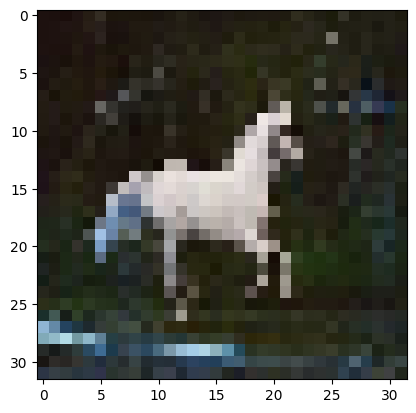

In [37]:
from keras.models import load_model
model = load_model('cifar10.h5')

import cv2
tst = cv2.imread('horse.png', cv2.IMREAD_COLOR)
tst = cv2.resize(tst, (32, 32))
tst = tst.reshape((1, 32 * 32 * 3))
tst = tst.astype('float32') / 255


plt.imshow(tst.reshape((32, 32, 3)), cmap=plt.cm.binary)
plt.show()



In [38]:

prediction(tst, 'frog', classes)

1/1 [==============================] - 0s 66ms/step
Prediction: horse
Answer: frog
airplane - 0.07812
automobile - 0.03403
bird - 0.13646
cat - 0.04969
deer - 0.19092
dog - 0.03903
frog - 0.07973
horse - 0.35938
ship - 0.01276
truck - 0.01987


In [39]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


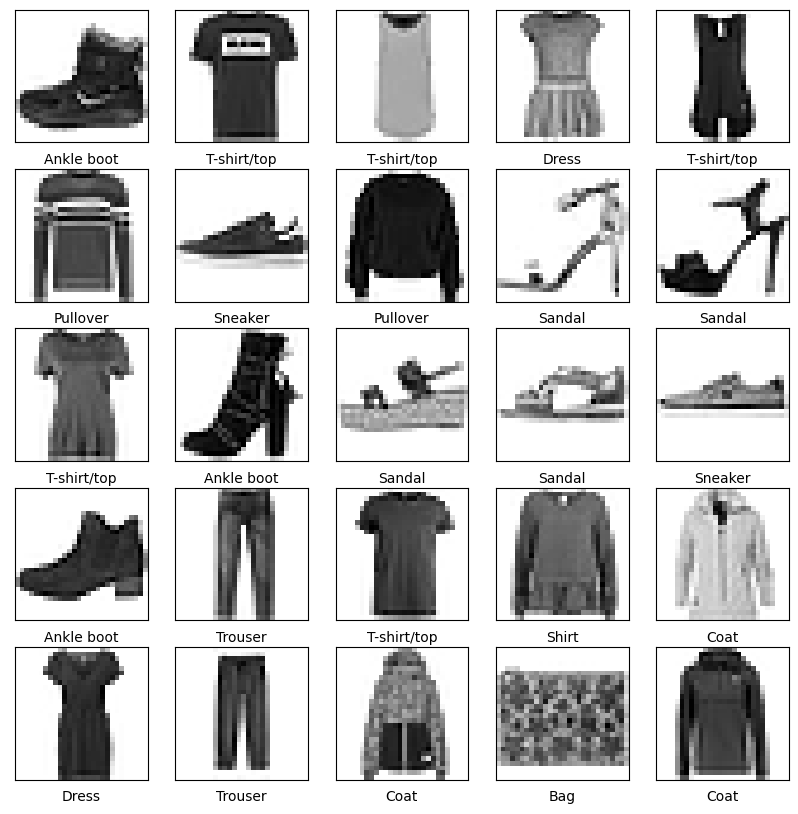

In [40]:

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])



In [41]:

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255



In [42]:

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [43]:

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [44]:

network.fit(train_images, train_labels, epochs=6, batch_size=128)

Epoch 1/6
469/469 [==============================] - 4s 9ms/step - loss: 0.5543 - accuracy: 0.8016
Epoch 2/6
469/469 [==============================] - 4s 8ms/step - loss: 0.3830 - accuracy: 0.8592
Epoch 3/6
469/469 [==============================] - 4s 9ms/step - loss: 0.3377 - accuracy: 0.8746
Epoch 4/6
469/469 [==============================] - 4s 9ms/step - loss: 0.3137 - accuracy: 0.8840
Epoch 5/6
469/469 [==============================] - 4s 9ms/step - loss: 0.2924 - accuracy: 0.8920
Epoch 6/6
469/469 [==============================] - 4s 9ms/step - loss: 0.2776 - accuracy: 0.8978


In [45]:


test_loss, test_acc = network.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8788


In [ ]:

network.save('fashion_mnist.h5')

In [46]:


from keras.models import load_model
model = load_model('fashion_mnist.h5')

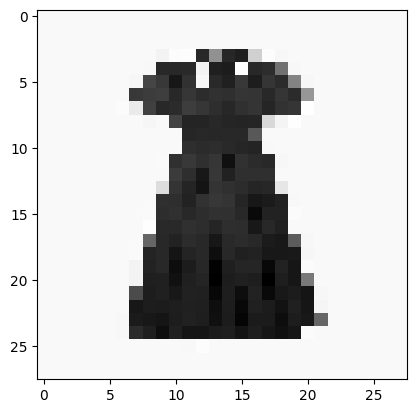

In [47]:


import cv2
tst = cv2.imread('dress.png', cv2.IMREAD_GRAYSCALE)
tst = cv2.resize(tst, (28, 28))
tst = 255 - tst
tst = tst.reshape((1, 28 * 28))
tst = tst.astype('float32') / 255


plt.imshow(tst.reshape((28, 28)), cmap=plt.cm.binary)
plt.show()


In [48]:
prediction(tst, 'Dress', classes)

1/1 [==============================] - 0s 58ms/step
Prediction: Dress
Answer: Dress
T-shirt/top - 0.38379
Trouser - 0.01052
Pullover - 0.00233
Dress - 0.47465
Coat - 0.00444
Sandal - 9e-05
Shirt - 0.1166
Sneaker - 0.00018
Bag - 0.00632
Ankle boot - 0.00108
